# Hi Patrick! Can you see this?

# Linear regression with one variable

Given data with city polulation and food truck profit

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('../content/drive/My Drive/ex1data1.txt', header=None)
df.rename(columns={0:'Population', 1:'Profit'}, inplace=True)  # rename the columns, since the text file doesn't come with any headers
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0, 0.5, 'Profit in $10,000s')

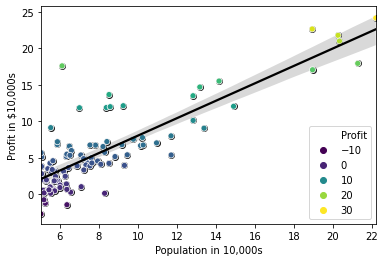

In [0]:
sns.regplot(x='Population', y='Profit', data=df, color='black')
sns.scatterplot(x='Population', y='Profit', data=df, hue='Profit', palette='viridis')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')

# Implement Batch Gradient Descent

In [0]:
def hypothesis(theta, x):
    return theta[0] + theta[1]*x 


def cost(y, predictions):
  return 0.5 * np.mean(np.square(predictions - y))


def _grad_loss(predictions, x, y):
  error = predictions - y
  loss_grad = [
    np.mean(error),
    np.mean(error * x)
  ]
  return np.array(loss_grad)

import pdb
def batch_gradient_descent(theta = [0, 0], learning_rate = 0.01, max_iter = 1500, eps = 1e-5): 
  converged = False 
  cost_list, theta_list = [], []
  cost_grad_list = [np.array([1e6, 1e6])]
  theta = np.array(theta, dtype=np.float64)  # convert theta to float array
  n = 0
  x = df['Population'].values
  y = df['Profit'].values
  while not converged: 
    theta_list.append(theta)
    current_predictions = hypothesis(theta, x)
    loss = cost(y, current_predictions)  # mean squared error

    # update theta simultaneously
    loss_gradient = _grad_loss(current_predictions, x, y)
    theta -= learning_rate * loss_gradient



    # keep track of variables
    theta_list.append(theta)
    cost_list.append(loss)
    cost_grad_list.append(loss_gradient)
    n += 1

    # define convergence to be when abs. diff between most recent two gradients <= eps
    # or if num. iterations exceeds maximum
    converged = (np.all(np.abs(np.diff(cost_grad_list[-2:], axis=0)) <= eps)
      or 
      n >= max_iter
    )
  
  return theta, cost_list, cost_grad_list, theta_list

In [0]:
theta, cost_list, cost_grad_list, theta_list = batch_gradient_descent(learning_rate = 0.02, max_iter=3000)
theta, len(cost_list), cost_list[-1]

(array([-3.88051101,  1.19149962]), 1540, 4.476992757423765)

# Plot results

Text(0, 0.5, 'Mean Squared Loss')

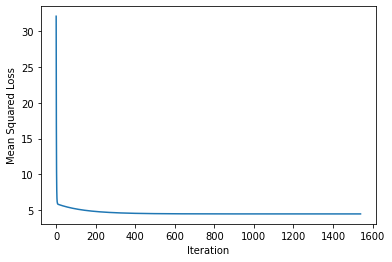

In [0]:
plt.plot(range(len(cost_list)), cost_list)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Loss')

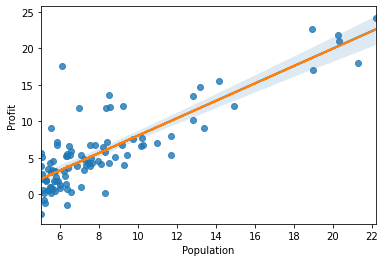

In [0]:
sns.regplot(x='Population', y='Profit', data=df)
plt.plot(df['Population'], hypothesis(theta, df['Population']))

# Test with scikit-learn to see if our parameters match

In [0]:
from sklearn.linear_model import LinearRegression
X = df['Population'].values.reshape(-1, 1)
y = df['Profit'].values
lin_reg = LinearRegression().fit(X, y)
theta, lin_reg.intercept_, lin_reg.coef_

(array([-3.88051101,  1.19149962]), -3.89578087831185, array([1.19303364]))

(4.0, 22.0)

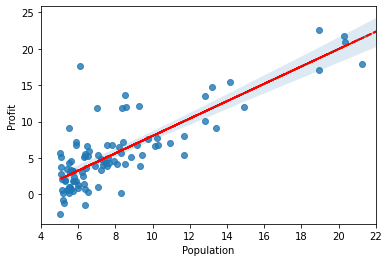

In [0]:
sns.regplot(x='Population', y='Profit', data=df, line_kws={'linestyle':'--'})
plt.plot(X, hypothesis(theta, X), linestyle='--')
plt.plot(X, lin_reg.predict(X), 'red', linestyle='--')
plt.xlim((4, 22))